In [ ]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import pprint
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings

import tensorflow as tf
from tensorflow.keras import layers, regularizers

# followed directions from sklearn about how to get the Boston Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 1]  # Corrected index to 1 for the second column

# Creating X (features) and Y (target)
X = data[:, :-1]
y = target

# Display the shapes of X and y to verify
print("Shape of X:", X.shape)
print("Shape of Y:", y.shape)


Shape of X: (506, 12)
Shape of Y: (506,)


In [ ]:
# create train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (404, 12)
Shape of X_test: (102, 12)
Shape of y_train: (404,)
Shape of y_test: (102,)


In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
# Mean Absolute Error with L1 reg
print("Mean Absolute Error with L1: %.2f" % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [ 6.05870246e-02  1.92528294e-02  7.35273924e-02 -1.71340620e+00
  9.06399132e+00 -4.43981654e+00  7.80358898e-02  9.49129553e-02
  8.46275970e-02 -2.04197264e-03  1.43508708e-01 -6.70302251e-03]
Mean squared error: 15.88
Coefficient of determination: 0.69
Mean Absolute Error with L1: 2.75


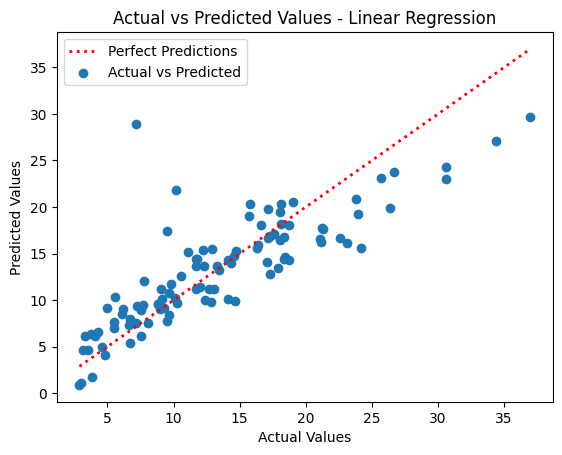

In [ ]:
# plotting

# Scatter plot of actual vs predicted values, with perfect-predictions line
perfect_predictions = np.linspace(min(y_test), max(y_test), 100)
plt.plot(perfect_predictions, perfect_predictions, color='red', linestyle='dotted', linewidth=2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - Linear Regression")
plt.legend(["Perfect Predictions", "Actual vs Predicted"])
plt.show()

# Optionally can plot the residuals by uncommenting
# residuals = y_test - y_pred
# plt.scatter(y_pred, residuals)
# plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
# plt.xlabel("Predicted Values")
# plt.ylabel("Residuals")
# plt.title("Residuals Plot - Linear Regression")
# plt.show()

In [ ]:

# Create linear regression object with L1 regularization (Lasso)
# through trial-and-error, I found alpha=0.07 to get MSE and MAE near minimums, and maximized COD
# afterward I saw in the book that I could have used a grid search but didn't want to run this again as I was happy with the results
regr_l1 = linear_model.Lasso(alpha=0.07)

# Train the model using the training sets
regr_l1.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_l1 = regr_l1.predict(X_test)

# The coefficients with L1
print("Coefficients with L1: \n", regr_l1.coef_)

# Mean squared error with L1
print("Mean squared error with L1: %.2f" % mean_squared_error(y_test, y_pred_l1))

# Coefficient of determination with L1
print("Coefficient of determination with L1: %.2f" % r2_score(y_test, y_pred_l1))

# Mean Absolute Error with L1 reg
print("Mean Absolute Error with L1: %.2f" % mean_absolute_error(y_test, y_pred_l1))

Coefficients with L1: 
 [ 6.07561212e-02  1.38901849e-02  1.07063610e-01 -4.83200496e-01
  0.00000000e+00 -4.45646674e+00  8.64901482e-02 -0.00000000e+00
  8.40593987e-02  2.99820716e-05  4.48896099e-02 -7.39802981e-03]
Mean squared error with L1: 14.60
Coefficient of determination with L1: 0.72
Mean Absolute Error with L1: 2.63


In [ ]:
# Create linear regression object with L2 regularization (Ridge)
# through trial-and-error, I found alpha=22 to reduce MSE and MAE to minimums, and maximized COD
# afterward I saw in the book that I could have used a grid search but didn't want to run this again as I was happy with the results
regr_l2 = linear_model.Ridge(alpha=22)

# Train the model using the training sets
regr_l2.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_l2 = regr_l2.predict(X_test)

# The coefficients with L2
print("Coefficients with L2: \n", regr_l2.coef_)

# Mean squared error with L2
print("Mean squared error with L2: %.2f" % mean_squared_error(y_test, y_pred_l2))

# Coefficient of determination with L2
print("Coefficient of determination with L2: %.2f" % r2_score(y_test, y_pred_l2))
# Mean Absolute Error with L2 reg
print("Mean Absolute Error with L2: %.2f" % mean_absolute_error(y_test, y_pred_l2))

Coefficients with L2: 
 [ 6.42163001e-02  1.41265184e-02  1.29752382e-01 -9.19411082e-01
  5.38785761e-01 -4.01909083e+00  8.57326211e-02  2.07077264e-02
  7.79721685e-02 -2.02899520e-04  9.48437380e-02 -7.18279954e-03]
Mean squared error with L2: 14.71
Coefficient of determination with L2: 0.72
Mean Absolute Error with L2: 2.66


In [ ]:
# Conclusions:
# L1 and L2 performed very similarly once optimized but had extremely different behavior with respect to changes in alpha
# Additionally, as expected Lasso regression dropped some variables while Ridge regression did not.
# Surprisingly, the models de-emphasized different variables. L1 dropped NOX and DIS entirely. L2 chose to de-emphasize PTRATIO and LSTAT the most.